# Import



In [ ]:
import gzip
import pickle
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os
import time
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image


#Evaluate funkcija




In [ ]:

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [ ]:
path = 'flatland_train.data'
X,y = pickle.load(gzip.open(path,'rb')) 

# data pre-proc
y[y != 0] -= 2
X = X.reshape (X.shape[0],50,50,1) / 255.

## Splitting data to train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) 

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7000, 50, 50, 1)
y_train: (7000,)
X_test: (3000, 50, 50, 1)
y_test: (3000,)


# Testuojame DNN 

## Išbandome paprastą DNN modelį

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50, 50]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               320128    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 329,034
Trainable params: 329,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = model.fit(X_train, y_train, epochs=25,validation_data=[X_test,y_test])

Epoch 1/25
219/219 [==============================] - 2s 6ms/step - loss: 1.5802 - accuracy: 0.3924 - val_loss: 1.3661 - val_accuracy: 0.4693
Epoch 2/25
219/219 [==============================] - 1s 5ms/step - loss: 1.2987 - accuracy: 0.4769 - val_loss: 1.2557 - val_accuracy: 0.4737
Epoch 3/25
219/219 [==============================] - 1s 5ms/step - loss: 1.2213 - accuracy: 0.4989 - val_loss: 1.2419 - val_accuracy: 0.4613
Epoch 4/25
219/219 [==============================] - 1s 5ms/step - loss: 1.1741 - accuracy: 0.5116 - val_loss: 1.2209 - val_accuracy: 0.4957
Epoch 5/25
219/219 [==============================] - 1s 5ms/step - loss: 1.1419 - accuracy: 0.5223 - val_loss: 1.1904 - val_accuracy: 0.4893
Epoch 6/25
219/219 [==============================] - 1s 5ms/step - loss: 1.1030 - accuracy: 0.5441 - val_loss: 1.1457 - val_accuracy: 0.5197
Epoch 7/25
219/219 [==============================] - 1s 5ms/step - loss: 1.0662 - accuracy: 0.5619 - val_loss: 1.1440 - val_accuracy: 0.5120
Epoch 

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 67.40%


In [ ]:
model.save('modelis.h5')

In [ ]:
model = keras.models.load_model('modelis.h5')
evaluate('flatland_train.data', model)

0.7567

## Pakeičiame optimizer iš sgd į Adam 

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50, 50]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2500)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               320128    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 329,034
Trainable params: 329,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = model.fit(X_train, y_train, epochs=25,validation_data=[X_test,y_test])

Epoch 1/25
219/219 [==============================] - 3s 10ms/step - loss: 1.3396 - accuracy: 0.4427 - val_loss: 1.1610 - val_accuracy: 0.4940
Epoch 2/25
219/219 [==============================] - 2s 10ms/step - loss: 1.0685 - accuracy: 0.5564 - val_loss: 1.0059 - val_accuracy: 0.5703
Epoch 3/25
219/219 [==============================] - 2s 10ms/step - loss: 0.8861 - accuracy: 0.6341 - val_loss: 0.8636 - val_accuracy: 0.6530
Epoch 4/25
219/219 [==============================] - 1s 6ms/step - loss: 0.7417 - accuracy: 0.7007 - val_loss: 0.8501 - val_accuracy: 0.6487
Epoch 5/25
219/219 [==============================] - 1s 5ms/step - loss: 0.6577 - accuracy: 0.7397 - val_loss: 0.7894 - val_accuracy: 0.6557
Epoch 6/25
219/219 [==============================] - 1s 5ms/step - loss: 0.6105 - accuracy: 0.7536 - val_loss: 0.6998 - val_accuracy: 0.7067
Epoch 7/25
219/219 [==============================] - 1s 5ms/step - loss: 0.5543 - accuracy: 0.7831 - val_loss: 0.6951 - val_accuracy: 0.7120
Epo

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 79.43%


In [ ]:
model.save('modelis.h5')

In [ ]:
model = keras.models.load_model('modelis.h5')
evaluate('flatland_train.data', model)

0.8755

Galima pastebėti, kad su optimizer Adam pasiekėme žymiai gersnių rezultatų, toliau keičiame kitus parametrus ir dar tobuliname modelį

## Optimizer Adam ir pridėta layers

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(128,activation='relu')) 
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(16,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'Adam',
              metrics=['accuracy'])


In [ ]:
loss = model.fit(X_train, y_train, epochs=30,validation_data=[X_test,y_test])

Epoch 1/30
219/219 [==============================] - 3s 11ms/step - loss: 1.3796 - accuracy: 0.4367 - val_loss: 1.2280 - val_accuracy: 0.5047
Epoch 2/30
219/219 [==============================] - 2s 10ms/step - loss: 1.0902 - accuracy: 0.5466 - val_loss: 1.0940 - val_accuracy: 0.5600
Epoch 3/30
219/219 [==============================] - 2s 10ms/step - loss: 0.9265 - accuracy: 0.6053 - val_loss: 0.9390 - val_accuracy: 0.6147
Epoch 4/30
219/219 [==============================] - 2s 11ms/step - loss: 0.7871 - accuracy: 0.6777 - val_loss: 0.8194 - val_accuracy: 0.6497
Epoch 5/30
219/219 [==============================] - 3s 12ms/step - loss: 0.6988 - accuracy: 0.7200 - val_loss: 0.7794 - val_accuracy: 0.6693
Epoch 6/30
219/219 [==============================] - 2s 8ms/step - loss: 0.6368 - accuracy: 0.7470 - val_loss: 0.7994 - val_accuracy: 0.6680
Epoch 7/30
219/219 [==============================] - 1s 6ms/step - loss: 0.5811 - accuracy: 0.7650 - val_loss: 0.6929 - val_accuracy: 0.7140
E

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 85.00%


In [ ]:
model.save('modelis.h5')

In [ ]:
model = keras.models.load_model('modelis.h5')
evaluate('flatland_train.data', model)

0.9247

Train set accuracy 92.47% Test set (simple) accuracy 86.00% Test set (adv.) accuracy 63.45%

Patobulinus DNN modelį pavyko pasiekti labai gerų rezultatų train ir test(simple) duomenų, tačiau ant advanced test set procentas mažas, todėl toliau išbandau CNN.

# CNN modelio pakeitimai ir testavimai

### Išbandome paprastą CNN modelį (CNN1)

In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
219/219 [==============================] - 11s 24ms/step - loss: 1.2022 - accuracy: 0.5267 - val_loss: 2.9156 - val_accuracy: 0.2457
Epoch 2/10
219/219 [==============================] - 4s 17ms/step - loss: 0.5266 - accuracy: 0.8176 - val_loss: 5.3613 - val_accuracy: 0.1700
Epoch 3/10
219/219 [==============================] - 3s 16ms/step - loss: 0.2697 - accuracy: 0.9303 - val_loss: 1.1827 - val_accuracy: 0.5847
Epoch 4/10
219/219 [==============================] - 3s 16ms/step - loss: 0.1818 - accuracy: 0.9526 - val_loss: 0.3805 - val_accuracy: 0.8940
Epoch 5/10
219/219 [==============================] - 4s 17ms/step - loss: 0.1241 - accuracy: 0.9667 - val_loss: 0.3815 - val_accuracy: 0.8780
Epoch 6/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0797 - accuracy: 0.9784 - val_loss: 0.2921 - val_accuracy: 0.9350
Epoch 7/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.3714 - val_accuracy: 0.919

In [ ]:
pd.DataFrame(loss.history).plot()

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 86.77%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9126

Train set accuracy 91.26% Test set (simple) accuracy 87.93% Test set (adv.) accuracy 65.83%

Su paprastu CNN modeliu iškart pasiekėme geresnių rezultatų simple ir advanced test setuose per tris kartus mažiau epochų.

### CNN 2


In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
219/219 [==============================] - 5s 14ms/step - loss: 0.9947 - accuracy: 0.6124 - val_loss: 2.8024 - val_accuracy: 0.1653
Epoch 2/10
219/219 [==============================] - 3s 12ms/step - loss: 0.3887 - accuracy: 0.8736 - val_loss: 3.3006 - val_accuracy: 0.1520
Epoch 3/10
219/219 [==============================] - 3s 12ms/step - loss: 0.2028 - accuracy: 0.9461 - val_loss: 0.5972 - val_accuracy: 0.7813
Epoch 4/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1287 - accuracy: 0.9666 - val_loss: 0.3648 - val_accuracy: 0.9040
Epoch 5/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0852 - accuracy: 0.9780 - val_loss: 0.2923 - val_accuracy: 0.9307
Epoch 6/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0599 - accuracy: 0.9836 - val_loss: 0.2601 - val_accuracy: 0.9463
Epoch 7/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0469 - accuracy: 0.9874 - val_loss: 0.2279 - val_accuracy: 0.9570

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 95.57%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9818

Train set accuracy 98.18% Test set (simple) accuracy 97.00% Test set (adv.) accuracy 76.00%

### CNN 3 


In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
loss = model.fit(X_train, y_train, epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
219/219 [==============================] - 4s 14ms/step - loss: 1.0661 - accuracy: 0.5894 - val_loss: 2.8917 - val_accuracy: 0.1830
Epoch 2/10
219/219 [==============================] - 2s 11ms/step - loss: 0.3729 - accuracy: 0.8826 - val_loss: 3.9460 - val_accuracy: 0.2387
Epoch 3/10
219/219 [==============================] - 3s 11ms/step - loss: 0.1922 - accuracy: 0.9521 - val_loss: 3.2540 - val_accuracy: 0.3370
Epoch 4/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1383 - accuracy: 0.9634 - val_loss: 0.2318 - val_accuracy: 0.9497
Epoch 5/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0863 - accuracy: 0.9789 - val_loss: 0.2936 - val_accuracy: 0.9180
Epoch 6/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0723 - accuracy: 0.9780 - val_loss: 0.3504 - val_accuracy: 0.9040
Epoch 7/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0645 - accuracy: 0.9799 - val_loss: 0.4543 - val_accuracy: 0.8973

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.17%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9823

Train set accuracy 98.51% Test set (simple) accuracy 98.00% Test set (adv.) accuracy 79.01%

### CNN 4 blogiau nei CNN3



In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
219/219 [==============================] - 9s 24ms/step - loss: 1.2795 - accuracy: 0.4846 - val_loss: 2.8353 - val_accuracy: 0.1810
Epoch 2/10
219/219 [==============================] - 5s 22ms/step - loss: 0.7276 - accuracy: 0.7139 - val_loss: 4.1580 - val_accuracy: 0.1500
Epoch 3/10
219/219 [==============================] - 5s 21ms/step - loss: 0.3700 - accuracy: 0.8880 - val_loss: 1.5497 - val_accuracy: 0.3767
Epoch 4/10
219/219 [==============================] - 3s 15ms/step - loss: 0.2350 - accuracy: 0.9411 - val_loss: 0.2960 - val_accuracy: 0.9357
Epoch 5/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1771 - accuracy: 0.9514 - val_loss: 0.6485 - val_accuracy: 0.7950
Epoch 6/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1432 - accuracy: 0.9611 - val_loss: 0.2654 - val_accuracy: 0.9447
Epoch 7/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.3945 - val_accuracy: 0.8957

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 94.67%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

### CNN 5



In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
219/219 [==============================] - 9s 20ms/step - loss: 1.0643 - accuracy: 0.5827 - val_loss: 2.7719 - val_accuracy: 0.2027
Epoch 2/10
219/219 [==============================] - 3s 16ms/step - loss: 0.4375 - accuracy: 0.8564 - val_loss: 3.0541 - val_accuracy: 0.2073
Epoch 3/10
219/219 [==============================] - 4s 20ms/step - loss: 0.2261 - accuracy: 0.9431 - val_loss: 1.0810 - val_accuracy: 0.5563
Epoch 4/10
219/219 [==============================] - 4s 16ms/step - loss: 0.1354 - accuracy: 0.9674 - val_loss: 0.2785 - val_accuracy: 0.9413
Epoch 5/10
219/219 [==============================] - 3s 16ms/step - loss: 0.0989 - accuracy: 0.9736 - val_loss: 0.2628 - val_accuracy: 0.9397
Epoch 6/10
219/219 [==============================] - 4s 17ms/step - loss: 0.0600 - accuracy: 0.9833 - val_loss: 0.2737 - val_accuracy: 0.9523
Epoch 7/10
219/219 [==============================] - 3s 13ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.3092 - val_accuracy: 0.9467

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.63%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9873

Train set accuracy 98.73% Test set (simple) accuracy 97.99% Test set (adv.) accuracy 76.40%

### CNN 6



In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(64,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(128,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(256,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(16, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
219/219 [==============================] - 11s 26ms/step - loss: 1.5124 - accuracy: 0.4510 - val_loss: 2.2258 - val_accuracy: 0.1907
Epoch 2/10
219/219 [==============================] - 5s 22ms/step - loss: 0.6198 - accuracy: 0.7863 - val_loss: 3.0051 - val_accuracy: 0.2887
Epoch 3/10
219/219 [==============================] - 5s 21ms/step - loss: 0.3456 - accuracy: 0.9136 - val_loss: 0.4005 - val_accuracy: 0.8970
Epoch 4/10
219/219 [==============================] - 4s 19ms/step - loss: 0.2643 - accuracy: 0.9377 - val_loss: 0.1822 - val_accuracy: 0.9707
Epoch 5/10
219/219 [==============================] - 4s 16ms/step - loss: 0.2107 - accuracy: 0.9579 - val_loss: 0.1687 - val_accuracy: 0.9770
Epoch 6/10
219/219 [==============================] - 3s 16ms/step - loss: 0.1922 - accuracy: 0.9640 - val_loss: 0.3488 - val_accuracy: 0.9253
Epoch 7/10
219/219 [==============================] - 3s 15ms/step - loss: 0.1865 - accuracy: 0.9590 - val_loss: 0.1539 - val_accuracy: 0.980

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))


Accuracy on test set - 97.87%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9831

Train set accuracy 98.31% Test set (simple) accuracy 99.31% Test set (adv.) accuracy 80.94%

### CNN 7



In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(32,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Dropout(0.25))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
loss = model.fit(X_train, y_train, epochs=20,validation_data=[X_test,y_test])

Epoch 1/20
219/219 [==============================] - 4s 15ms/step - loss: 1.4980 - accuracy: 0.4146 - val_loss: 5.1241 - val_accuracy: 0.2770
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 1.1951 - accuracy: 0.4937 - val_loss: 1.7515 - val_accuracy: 0.3263
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 1.0108 - accuracy: 0.5789 - val_loss: 1.4379 - val_accuracy: 0.4270
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.7594 - accuracy: 0.6964 - val_loss: 0.9676 - val_accuracy: 0.5990
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.6445 - accuracy: 0.7537 - val_loss: 0.5336 - val_accuracy: 0.8100
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.5414 - accuracy: 0.8030 - val_loss: 0.4570 - val_accuracy: 0.8633
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.4409 - accuracy: 0.8426 - val_loss: 0.3267 - val_accuracy: 0.9297

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))


Accuracy on test set - 97.57%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9868

Train set accuracy 98.68% Test set (simple) accuracy 99.06% Test set (adv.) accuracy 79.14%

### CNN 8 



Train set accuracy 98.02% Test set (simple) accuracy 99.24% Test set (adv.) accuracy 82.91%

In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(64,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(128,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(keras.layers.Conv2D(256,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(56, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=7,validation_data=[X_test,y_test])

Epoch 1/7
219/219 [==============================] - 11s 28ms/step - loss: 1.6258 - accuracy: 0.3906 - val_loss: 2.2393 - val_accuracy: 0.1713
Epoch 2/7
219/219 [==============================] - 5s 24ms/step - loss: 0.8856 - accuracy: 0.6481 - val_loss: 3.2190 - val_accuracy: 0.1923
Epoch 3/7
219/219 [==============================] - 5s 22ms/step - loss: 0.4976 - accuracy: 0.8413 - val_loss: 1.9350 - val_accuracy: 0.3860
Epoch 4/7
219/219 [==============================] - 4s 19ms/step - loss: 0.3615 - accuracy: 0.9037 - val_loss: 0.2288 - val_accuracy: 0.9450
Epoch 5/7
219/219 [==============================] - 4s 17ms/step - loss: 0.2707 - accuracy: 0.9327 - val_loss: 0.3064 - val_accuracy: 0.9213
Epoch 6/7
219/219 [==============================] - 4s 17ms/step - loss: 0.2327 - accuracy: 0.9491 - val_loss: 0.3186 - val_accuracy: 0.9247
Epoch 7/7
219/219 [==============================] - 4s 16ms/step - loss: 0.2106 - accuracy: 0.9560 - val_loss: 0.1838 - val_accuracy: 0.9757


In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))


Accuracy on test set - 97.57%


In [ ]:
model.save('cnn.h5')

In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9802

# Geriausias gautas rezultatas su CNN







Train set accuracy 98.38% Test set (simple) accuracy 99.78% Test set (adv.) accuracy 82.93%

Šiame modelyje pasiekti gero rezultato padėjo Conv2D sluoksnių pridėjimas, taip pat MaxPooling2D, kuris mažina sluoksnius ir padeda geriau treniruotis, ir Dropout, kuris atmeta outliers neutronus. Taip pat pasirinkau early stopping- tik 7 epochas.

In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128,kernel_size =  (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1))   
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
loss = model.fit(X_train, y_train, epochs=7,validation_data=[X_test,y_test])

Epoch 1/7
219/219 [==============================] - 11s 28ms/step - loss: 1.6185 - accuracy: 0.3801 - val_loss: 2.6737 - val_accuracy: 0.1523
Epoch 2/7
219/219 [==============================] - 5s 23ms/step - loss: 0.9450 - accuracy: 0.6273 - val_loss: 3.8168 - val_accuracy: 0.2907
Epoch 3/7
219/219 [==============================] - 5s 24ms/step - loss: 0.5733 - accuracy: 0.7940 - val_loss: 1.6605 - val_accuracy: 0.4143
Epoch 4/7
219/219 [==============================] - 5s 22ms/step - loss: 0.3887 - accuracy: 0.8913 - val_loss: 0.2071 - val_accuracy: 0.9580
Epoch 5/7
219/219 [==============================] - 5s 22ms/step - loss: 0.3034 - accuracy: 0.9350 - val_loss: 0.1640 - val_accuracy: 0.9780
Epoch 6/7
219/219 [==============================] - 4s 17ms/step - loss: 0.2608 - accuracy: 0.9436 - val_loss: 0.1828 - val_accuracy: 0.9683
Epoch 7/7
219/219 [==============================] - 4s 17ms/step - loss: 0.2272 - accuracy: 0.9543 - val_loss: 0.1383 - val_accuracy: 0.9820


In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))


Accuracy on test set - 98.20%


In [ ]:
model.save('cnn.h5')


In [ ]:
model = keras.models.load_model('cnn.h5')
evaluate('flatland_train.data', model)

0.9838

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

pd.DataFrame(loss.history).plot()

# Duomenų grafinis pavaizdavimas

Grafiškai pavaizduojame duomenis, su kuriais treniravome modelius

In [ ]:
path = 'flatland_train.data'
X,y = pickle.load(gzip.open(path,'rb')) 

# data pre-proc
y[y != 0] -= 2
X = X / 255.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) 

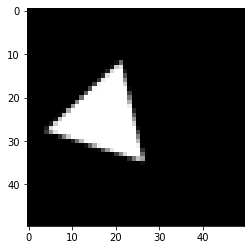

In [ ]:
plt.imshow(X_test[0],cmap='gray',vmin=0)

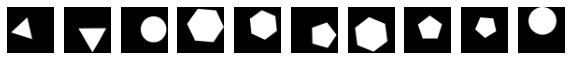

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
        plt.subplot(10, 10, 10 + i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.axis('off')
plt.show()

Suskaičiuojame kiek skirtingu klasių duomenų buvo ir pavaizduojame po vieną iš kiekvienos

In [ ]:
from collections import Counter 

Counter(y)

Counter({0.0: 1381, 1.0: 2853, 2.0: 1868, 3.0: 2137, 4.0: 1761})

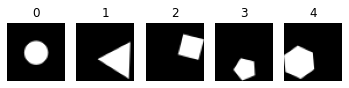

In [ ]:
for i in range(5):
    idx= np.where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show() 